# Introduction

This notebook contains a very brief summary, examples, and R-coding demos as additional material for the course on numerical optimization I lectured in summer term 2019. Complete lecture notes can be found in `./notes/numopt_lecture.pdf`. The focus is on solving continuous and non-linear optimization problems. For further reading on the topic I recommend the book "Numerical Optimization" by Nocedal and Wright.

# Unconstrained Optimization

The focus of unconstrained continuous optimization is on solving the optimization problem $$\min\limits_{x \in \mathbb{R}^{n}} f(x),$$ where $f:\mathbb{R}^{n} \rightarrow \mathbb{R}$ is continously differentiable.

## Line Search Method

A neccessary condition for $x^{*} \in \mathbb{R}^{n}$ to be a solution is $\nabla f(x^{*}) = 0$, i.e. $x^{*}$ is a *stationary point* of $f$. In general, there is no analytical solution to this non-linear equation such that numerical methods have to be applied in order to find stationary points. *Descent methods* generate a sequence $(x^{(k)})_{k \in \mathbb{N}_0}$ with $$f(x^{(k+1)}) < f(x^{(k)}) \ \ \forall k \in \mathbb{N}_0.$$ In this context, *line search methods* choose a *descent direction* $d^{(k)} \in \mathbb{R}^{n}$ and a *step length* $t_k > 0$ and use the update $$x^{(k+1)} \leftarrow x^{(k)} + t_k d^{(k)}.$$ Adequate descent directions are for example:
- $d^{(k)} = - \nabla f(x^{(k)})$
- $d^{(k)} = -A \nabla f(x^{(k)})$, where $A$ is symmetric positive definite

For the step length $t_k > 0$ the challenge is in avoiding both, a too small and a too large step. In practice, this is for example achieved by the *backtracking* approach that finds a step length that meets the *Wolfe conditions* (or the *Armijo condition*).

In [5]:
### backtracking line search (with default values)
backtracking <- function(f, gradf, x, d, tmax = 1, c = 0.01, rho = 0.5) {
  t <- tmax
  a <- f(x)                      # intercept of linear function
  b <- c * gradf(x) %*% d        # slope of linear function
  while (f(x + t*d) > a + b*t) {
    t <- rho*t
  }
  return(t)
}

## Steepest Descent Method

The direction $- \nabla f(x)$ is not only a descent direction, but it is the *steepest descent direction*. Using this descent direction yields the *steepest descent method*. Its popularity is based on the fact that it is a very simple method that guarantees global convergence under very mild assumptions.

In [53]:
### steepest descent method with backtracking line search
steepest_descent = function(f, gradf, x, t = NA, tol = 1e-10){
  n_iter <- 0                     # iteration counter
  iterates <- list(x)             # save iterates (for visualization)
  linesearch <- is.na(t)          # check if constant step size or linesearch
  while (sqrt(sum(gradf(x)^2)) > tol ) {     # check stopping criterion
    d <- -gradf(x)                           # steepest descent direction
    if (linesearch) {
      t <- backtracking(f, gradf, x, d)      # backtracking line search
    }
    x <- x + t*d                             # steepest descent step
    n_iter <- n_iter+1
    iterates[[n_iter+1]] <- x
  }
  result <- list()
  result$results <- list("solution" = x,        # solution vector
                         "opt_value" = f(x),    # optimal value
                         "n_iter" = n_iter)     # number of iterations
  result$iterates <- iterates                   # all iterates (visualization)
  return(result)   
}

test function himmelblau ...

solution = (-2.805118, 3.131313) 
optimal value = 0.000000 
number of iterations = 23

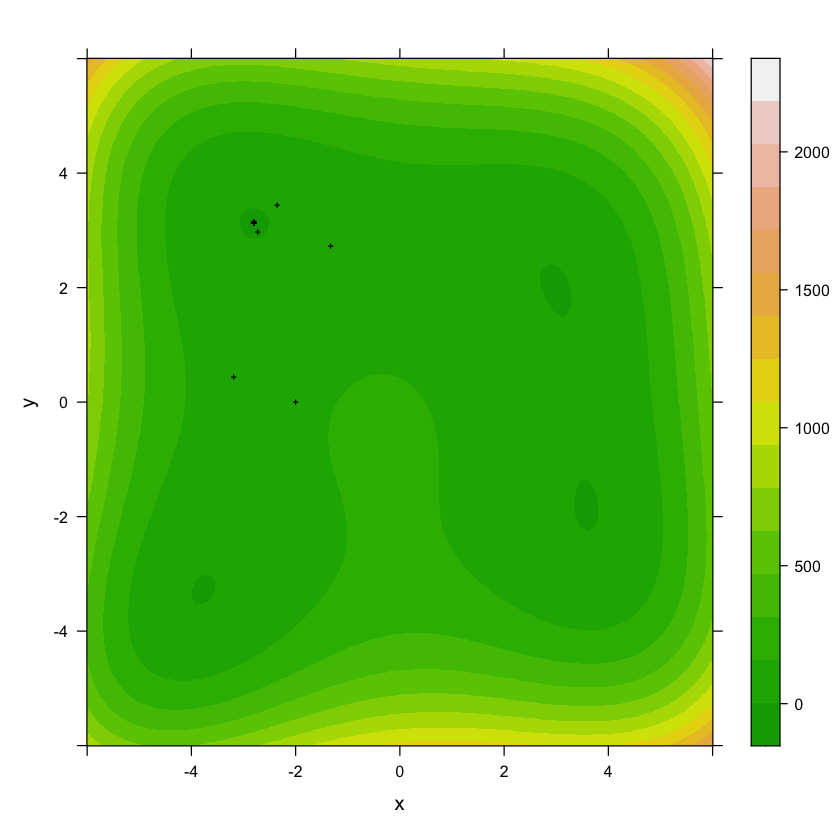

In [64]:
# steepest descent for Himmelblau function
source("./src/aux.R")
source("./src/objectives.R")
x_start <- c(-2, 0)
#x_start <- c(-1, 1)
sd_min <- steepest_descent(f_himmel, grad_himmel, x = x_start)
cat(sprintf("solution = (%f, %f) \n", sd_min$results$solution[1], sd_min$results$solution[2]))
cat(sprintf("optimal value = %f \n", sd_min$results$opt_value))
cat(sprintf("number of iterations = %s", sd_min$results$n_iter))
plot_iterates_2d(f_himmel, sd_min$iterates, xlim=c(-6, 6), ylim=c(-6, 6))

Unfortunately, the steepest descent method is not very efficient and actually becomes very slow for many problems since the convergence rate is only linear: $$f(x^{(k+1)}) - f(x^{*}) \leq \left(\dfrac{\kappa(\nabla^2 f(x^*))-1}{\kappa(\nabla^2 f(x^*))+1} \right)^2 (f(x^{(k)}) - f(x^{*})),$$ where $\kappa$ denotes the condition number.

show how bad

As an example consider the Rosenbrock function $$f_{rosen}: \mathbb{R}^2 \rightarrow \mathbb{R}, \ \ x \mapsto 100(x_2−x_1^2)^2+(1−x_1)^2$$ which has a strict unique minimizer at $x^* = (1,1)^T$ with $f_{rosen}(x^*) = 0$.

solution = (1.000000, 1.000000) 
optimal value = 0.000000 
number of iterations = 24915

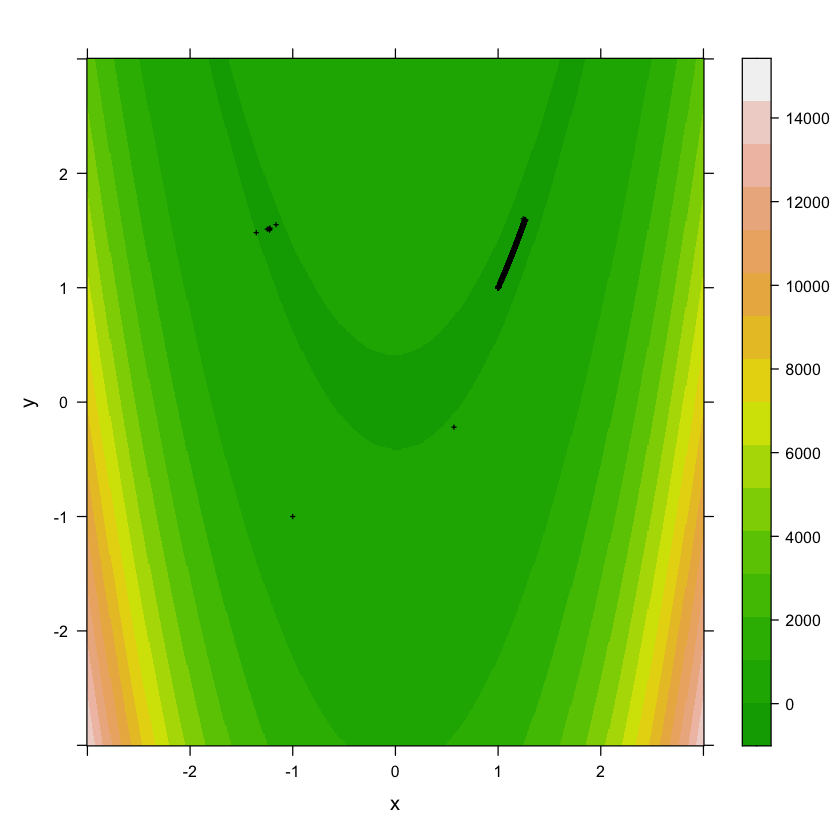

In [59]:
# steepest descent for Rosenbrock function
source("./src/aux.R")
source("./src/objectives.R")
x_start <- c(-1, -1)
sd_min <- steepest_descent(f_rosen, grad_rosen, x = x_start)
cat(sprintf("solution = (%f, %f) \n", sd_min$results$solution[1], sd_min$results$solution[2]))
cat(sprintf("optimal value = %f \n", sd_min$results$opt_value))
cat(sprintf("number of iterations = %s", sd_min$results$n_iter))
plot_iterates_2d(f_rosen, sd_min$iterates, xlim=c(-3, 3), ylim=c(-3, 3))

## Newton Method

## Quasi-Newton Method

## Trust-Region Methods

## Nonlinear Least-Squares Problems

CG / PCG?

# (Nonlinear) Constrained Optimization